In [ ]:
import pandas as pd

demo = pd.read_csv(
    "DEMO25Q1.txt",
    sep="$",
    encoding="latin1",
    low_memory=False
)

demo.head()
demo.shape
demo['sex'].value_counts(dropna=False)


,count
sex,
F,186231
M,131469
NaN,81778
UNK,1036


In [ ]:
reac = pd.read_csv(
    "REAC25Q1.txt",
    sep="$",
    encoding="latin1",
    low_memory=False
)

reac.head()


,primaryid,caseid,pt,drug_rec_act
0,100294532,10029453,Asthenia,NaN
1,100294532,10029453,Breast cancer metastatic,NaN
2,100294532,10029453,Palmar-plantar erythrodysaesthesia syndrome,NaN
3,100294532,10029453,Metastases to liver,NaN
4,100294532,10029453,Metastases to lymph nodes,NaN


In [ ]:
top_events = (
    reac['pt']
    .value_counts()
    .head(10)
    .reset_index()
)

top_events.columns = ['adverse_event', 'report_count']
top_events


,adverse_event,report_count
0,Off label use,34209
1,Drug ineffective,23422
2,Fatigue,19078
3,Product dose omission issue,17439
4,Nausea,15551
5,Diarrhoea,15327
6,Death,14494
7,Headache,12679
8,Pain,11878
9,Dyspnoea,11860


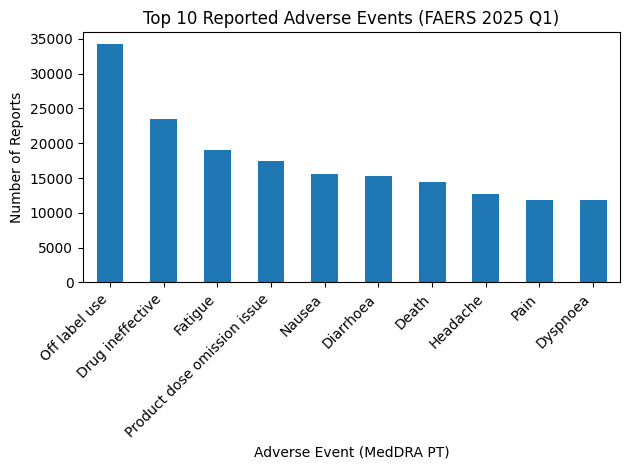

In [ ]:
import matplotlib.pyplot as plt

top_events.plot(
    x='adverse_event',
    y='report_count',
    kind='bar',
    legend=False
)

plt.title("Top 10 Reported Adverse Events (FAERS 2025 Q1)")
plt.xlabel("Adverse Event (MedDRA PT)")
plt.ylabel("Number of Reports")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
top_events.to_csv(
    "top_10_adverse_events_faers_2025q1.csv",
    index=False
)


In [ ]:
demo_reac = demo.merge(
    reac[['primaryid', 'pt']],
    on='primaryid',
    how='inner'
)

demo_reac.head()


,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,sex,e_sub,wt,wt_cod,rept_dt,to_mfr,occp_cod,reporter_country,occr_country,pt
0,100294532,10029453,2,F,NaN,20250319,20140322,20250326,EXP,NaN,...,F,Y,NaN,NaN,20250326,NaN,HP,IT,IT,Asthenia
1,100294532,10029453,2,F,NaN,20250319,20140322,20250326,EXP,NaN,...,F,Y,NaN,NaN,20250326,NaN,HP,IT,IT,Breast cancer metastatic
2,100294532,10029453,2,F,NaN,20250319,20140322,20250326,EXP,NaN,...,F,Y,NaN,NaN,20250326,NaN,HP,IT,IT,Palmar-plantar erythrodysaesthesia syndrome
3,100294532,10029453,2,F,NaN,20250319,20140322,20250326,EXP,NaN,...,F,Y,NaN,NaN,20250326,NaN,HP,IT,IT,Metastases to liver
4,100294532,10029453,2,F,NaN,20250319,20140322,20250326,EXP,NaN,...,F,Y,NaN,NaN,20250326,NaN,HP,IT,IT,Metastases to lymph nodes


In [ ]:
sex_events = (
    demo_reac
    .groupby(['sex', 'pt'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)

sex_events.head(10)


,sex,pt,count
6632,F,Off label use,15757
2795,F,Drug ineffective,10719
15985,M,Off label use,10478
3422,F,Fatigue,10284
6293,F,Nausea,9717
7627,F,Product dose omission issue,8669
2672,F,Diarrhoea,8551
4110,F,Headache,8146
6859,F,Pain,7470
12597,M,Drug ineffective,6985


In [ ]:
demo_reac_age = demo_reac[
    (demo_reac['age'].notna()) &
    (demo_reac['age_cod'] == 'YR')
].copy()


In [ ]:
bins = [0, 18, 40, 65, 120]
labels = ['<18', '18–39', '40–64', '65+']

demo_reac_age['age_group'] = pd.cut(
    demo_reac_age['age'],
    bins=bins,
    labels=labels
)


In [ ]:
age_events = (
    demo_reac_age
    .groupby(['age_group', 'pt'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)

age_events.head(10)


/tmp/ipython-input-3643262009.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['age_group', 'pt'])


,age_group,pt,count
29759,40–64,Off label use,8422
40992,65+,Off label use,7604
25586,40–64,Drug ineffective,5553
26259,40–64,Fatigue,5323
36454,65+,Death,5165
29386,40–64,Nausea,4842
37492,65+,Fatigue,4397
25454,40–64,Diarrhoea,4279
36687,65+,Diarrhoea,4271
30892,40–64,Product dose omission issue,4071


In [ ]:
age_events.to_csv(
    "adverse_events_by_age_group_faers_2025q1.csv",
    index=False
)


In [ ]:
import pandas as pd

drug = pd.read_csv(
    "DRUG25Q1.txt",
    sep="$",
    encoding="latin1",
    low_memory=False
)

drug.head()


,primaryid,caseid,drug_seq,role_cod,drugname,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq
0,100294532,10029453,1,PS,LETROZOLE,LETROZOLE,1,Unknown,UNK,NaN,NaN,U,NaN,NaN,NaN,20726.0,NaN,NaN,NaN,NaN
1,100294532,10029453,2,SS,LAPATINIB,LAPATINIB,1,Unknown,UNK,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100294532,10029453,3,SS,FULVESTRANT,FULVESTRANT,1,Unknown,UNK,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100294532,10029453,4,SS,CAPECITABINE,CAPECITABINE,1,Unknown,UNK,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100294532,10029453,5,SS,TRASTUZUMAB,TRASTUZUMAB,1,Unknown,UNK,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
drug.shape
drug.columns

Index(['primaryid', 'caseid', 'drug_seq', 'role_cod', 'drugname', 'prod_ai',
       'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr', 'cum_dose_unit',
       'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num', 'dose_amt',
       'dose_unit', 'dose_form', 'dose_freq'],
      dtype='object')

In [ ]:
ps_drugs = drug[drug['role_cod'] == 'PS'].copy()


In [ ]:
top_ps_drugs = (
    ps_drugs['drugname']
    .value_counts()
    .head(10)
    .reset_index()
)

top_ps_drugs.columns = ['drug_name', 'report_count']
top_ps_drugs


,drug_name,report_count
0,VEDOLIZUMAB,8309
1,HUMAN IMMUNOGLOBULIN G,2566
2,TEDUGLUTIDE,1573
3,DUPIXENT,1240
4,ALBUTEROL SULFATE,1154
5,INFLECTRA,835
6,IBRANCE,707
7,IDURSULFASE,680
8,HUMAN IMMUNOGLOBULIN G\HYALURONIDASE RECOMBINA...,652
9,XELJANZ XR,641


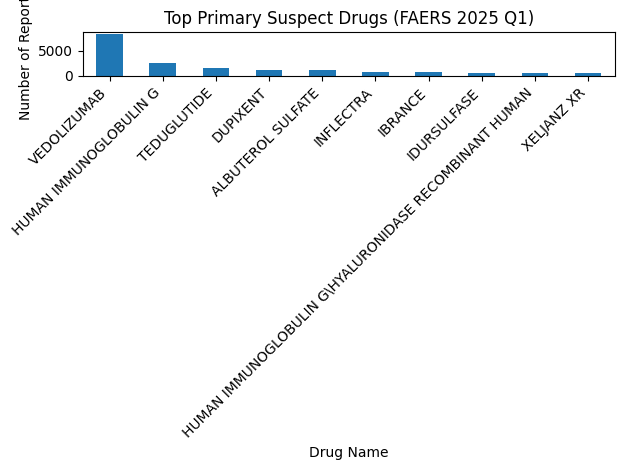

In [ ]:
import matplotlib.pyplot as plt

top_ps_drugs.plot(
    x='drug_name',
    y='report_count',
    kind='bar',
    legend=False
)

plt.title("Top Primary Suspect Drugs (FAERS 2025 Q1)")
plt.xlabel("Drug Name")
plt.ylabel("Number of Reports")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
top_ps_drugs.to_csv(
    "top_primary_suspect_drugs_faers_2025q1.csv",
    index=False
)


In [ ]:
ps_drugs = drug[drug['role_cod'] == 'PS'].copy()

ps_drugs.shape


(34907, 20)

In [ ]:
drug_reac = ps_drugs.merge(
    reac[['primaryid', 'pt']],
    on='primaryid',
    how='inner'
)

drug_reac.head()


NameError: name 'reac' is not defined

In [ ]:
import pandas as pd

reac = pd.read_csv(
    "REAC25Q1.txt",
    sep="$",
    encoding="latin1",
    low_memory=False
)

reac.head()


,primaryid,caseid,pt,drug_rec_act
0,100294532,10029453,Asthenia,NaN
1,100294532,10029453,Breast cancer metastatic,NaN
2,100294532,10029453,Palmar-plantar erythrodysaesthesia syndrome,NaN
3,100294532,10029453,Metastases to liver,NaN
4,100294532,10029453,Metastases to lymph nodes,NaN


In [ ]:
drug_reac = ps_drugs.merge(
    reac[['primaryid', 'pt']],
    on='primaryid',
    how='inner'
)

drug_reac.head()


,primaryid,caseid,drug_seq,role_cod,drugname,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,...,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq,pt
0,100294532,10029453,1,PS,LETROZOLE,LETROZOLE,1,Unknown,UNK,NaN,...,U,NaN,NaN,NaN,20726.0,NaN,NaN,NaN,NaN,Asthenia
1,100294532,10029453,1,PS,LETROZOLE,LETROZOLE,1,Unknown,UNK,NaN,...,U,NaN,NaN,NaN,20726.0,NaN,NaN,NaN,NaN,Breast cancer metastatic
2,100294532,10029453,1,PS,LETROZOLE,LETROZOLE,1,Unknown,UNK,NaN,...,U,NaN,NaN,NaN,20726.0,NaN,NaN,NaN,NaN,Palmar-plantar erythrodysaesthesia syndrome
3,100294532,10029453,1,PS,LETROZOLE,LETROZOLE,1,Unknown,UNK,NaN,...,U,NaN,NaN,NaN,20726.0,NaN,NaN,NaN,NaN,Metastases to liver
4,100294532,10029453,1,PS,LETROZOLE,LETROZOLE,1,Unknown,UNK,NaN,...,U,NaN,NaN,NaN,20726.0,NaN,NaN,NaN,NaN,Metastases to lymph nodes


In [ ]:
drug_event_counts = (
    drug_reac
    .groupby(['drugname', 'pt'])
    .size()
    .reset_index(name='report_count')
    .sort_values('report_count', ascending=False)
)

drug_event_counts.head(10)


,drugname,pt,report_count
72098,VEDOLIZUMAB,Off label use,5904
71565,VEDOLIZUMAB,Diarrhoea,2861
71266,VEDOLIZUMAB,Abdominal pain,2651
71524,VEDOLIZUMAB,Crohn's disease,2605
71504,VEDOLIZUMAB,Colitis ulcerative,2376
71765,VEDOLIZUMAB,Haematochezia,1708
71670,VEDOLIZUMAB,Fatigue,1513
71698,VEDOLIZUMAB,Frequent bowel movements,1513
34958,INFLECTRA,Off label use,1459
71988,VEDOLIZUMAB,Malaise,1277


In [ ]:
top_drug_events = drug_event_counts.head(10)
top_drug_events


,drugname,pt,report_count
72098,VEDOLIZUMAB,Off label use,5904
71565,VEDOLIZUMAB,Diarrhoea,2861
71266,VEDOLIZUMAB,Abdominal pain,2651
71524,VEDOLIZUMAB,Crohn's disease,2605
71504,VEDOLIZUMAB,Colitis ulcerative,2376
71765,VEDOLIZUMAB,Haematochezia,1708
71670,VEDOLIZUMAB,Fatigue,1513
71698,VEDOLIZUMAB,Frequent bowel movements,1513
34958,INFLECTRA,Off label use,1459
71988,VEDOLIZUMAB,Malaise,1277


In [ ]:
top_drug_events.to_csv(
    "top_ps_drug_adverse_event_pairs_faers_2025q1.csv",
    index=False
)


In [ ]:
outc = pd.read_csv(
    "OUTC25Q1.txt",
    sep="$",
    encoding="latin1",
    low_memory=False
)

outc.head()


,primaryid,caseid,outc_cod
0,100294532,10029453,OT
1,100496573,10049657,OT
2,1005762122,10057621,HO
3,100813192,10081319,CA
4,100813192,10081319,DE


In [ ]:
death_cases = outc[outc['outc_cod'] == 'DE'].copy()

death_cases.shape


(30501, 3)

In [ ]:
death_reac = death_cases.merge(
    reac[['primaryid', 'pt']],
    on='primaryid',
    how='inner'
)

death_reac.head()


,primaryid,caseid,outc_cod,pt
0,100813192,10081319,DE,Trisomy 18
1,100813192,10081319,DE,Maternal exposure before pregnancy
2,100813192,10081319,DE,Maternal exposure during pregnancy
3,102183593,10218359,DE,Toxicity to various agents
4,102183593,10218359,DE,Completed suicide


In [ ]:
death_event_counts = (
    death_reac
    .groupby('pt')
    .size()
    .reset_index(name='report_count')
    .sort_values('report_count', ascending=False)
)

death_event_counts.head(10)


,pt,report_count
1057,Death,13229
2898,Off label use,2266
908,Completed suicide,2027
4097,Toxicity to various agents,1728
1224,Drug ineffective,1498
3184,Pneumonia,1359
1212,Drug abuse,1128
1159,Diarrhoea,970
1662,General physical health deterioration,920
927,Condition aggravated,915


In [ ]:
death_ps_drugs = death_cases.merge(
    ps_drugs[['primaryid', 'drugname']],
    on='primaryid',
    how='inner'
)

death_ps_drugs.head()


,primaryid,caseid,outc_cod,drugname
0,100813192,10081319,DE,LEVETIRACETAM
1,102183593,10218359,DE,QUETIAPINE
2,102332354,10233235,DE,TEMODAL
3,106075015,10607501,DE,FONDAPARINUX
4,107545582,10754558,DE,HYDROMORPHONE HYDROCHLORIDE


In [ ]:
death_drug_counts = (
    death_ps_drugs
    .groupby('drugname')
    .size()
    .reset_index(name='death_reports')
    .sort_values('death_reports', ascending=False)
)

death_drug_counts.head(10)


,drugname,death_reports
358,TEDUGLUTIDE,52
174,HUMAN IMMUNOGLOBULIN G,50
162,FOTIVDA,45
328,RITUXIMAB,33
69,BUPIVACAINE HYDROCHLORIDE,23
96,COSENTYX,22
188,IDURSULFASE,22
205,KEYTRUDA,21
129,ELIQUIS,20
282,OXYCONTIN,19


In [ ]:
death_event_counts.head(10).to_csv(
    "top_adverse_events_in_death_cases_faers_2025q1.csv",
    index=False
)

death_drug_counts.head(10).to_csv(
    "top_ps_drugs_in_death_cases_faers_2025q1.csv",
    index=False
)


In [ ]:
# 1. VEDOLIZUMAB + Diarrhoea vakaları
vedo_diarrhoea = drug_reac[
    (drug_reac['drugname'] == 'VEDOLIZUMAB') &
    (drug_reac['pt'] == 'Diarrhoea')
]

vedo_diarrhoea.shape


(2861, 21)

In [ ]:
# 2. VEDOLIZUMAB + Diarrhoea dışındaki adverse event'ler
vedo_all = drug_reac[drug_reac['drugname'] == 'VEDOLIZUMAB']

vedo_non_diarrhoea = vedo_all[vedo_all['pt'] != 'Diarrhoea']

vedo_all.shape, vedo_non_diarrhoea.shape


((77959, 21), (75098, 21))

In [ ]:
# 3. Diğer ilaçlar + Diarrhoea
non_vedo_diarrhoea = drug_reac[
    (drug_reac['drugname'] != 'VEDOLIZUMAB') &
    (drug_reac['pt'] == 'Diarrhoea')
]

non_vedo_diarrhoea.shape


(2984, 21)

In [ ]:
# 4. Diğer ilaçlar + Diarrhoea dışı AE'ler
non_vedo_non_diarrhoea = drug_reac[
    (drug_reac['drugname'] != 'VEDOLIZUMAB') &
    (drug_reac['pt'] != 'Diarrhoea')
]

non_vedo_non_diarrhoea.shape


(329199, 21)

In [ ]:
A = 2861
B = 75098
C = 2984
D = 329199

prr = (A / (A + B)) / (C / (C + D))
prr


4.085358588158683